In [1]:
import glob #to read the files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.interpolate import interp1d
import os.path 
from tabulate import tabulate #to export in table format

In [2]:
kernel = 0.5 * RBF(length_scale=1, length_scale_bounds=(1, 20)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5,0.5)) 

In [3]:
X_ = np.linspace(-10, 50, 60 + 1)
wave = np.linspace(3300, 8500, 520 + 1)
list_data = [[]for y in range(0,521)]

In [4]:
sn_names = glob.glob("/home/joao/Documentos/templates/data_ext/SN2012fr*.dat")

In [5]:
len(sn_names)

20

In [6]:
for i in range(0,len(sn_names)):

    y = []
    z = []

    file = open(sn_names[i])
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        y.append(co[0])
        z.append(co[1])


    #y = np.array(y, dtype=float)
    z = np.array(z, dtype=float)

    timetemp = lines[0]
    timetemp = timetemp[:-1]
    timetemp = float(timetemp[1:])

    f = max(z)

    for jj in range(0,len(z)):

        list_data[jj].append([timetemp,z[jj]])


In [7]:
jj=0

In [8]:
wave[jj]

3300.0

In [9]:
yy = []
zz = []
yyscatter = []

for k in range(0,len(list_data[jj])):

    yy.append([list_data[jj][k][0]])
    yyscatter.append(list_data[jj][k][0])
    zz.append(list_data[jj][k][1])

ff = max(zz)

zz = zz/ff

gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(yy, zz)
y_mean,y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
val_score = gp.score(yy, zz)

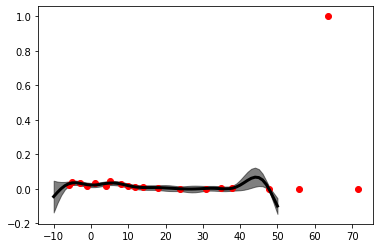

In [10]:
%matplotlib inline
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(yyscatter,zz, 'ro')
#plt.ylim(0,0.025)
plt.show()

In [11]:
val_score

0.9993872180826208